In [6]:
import import_ipynb
from Q_task_research import supplier,dataset1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

 B. Is any of the suppliers gaining more market share or experiencing revenue growth in the public sector during the observed period? 
 If so, which supplier over whom and how sure are you of this trend?

 Observed period = rok 2016

In [7]:
df = dataset1.df.sort_values(by=["PublishedAtUtc"]).reset_index(drop=True)
df = df[0:1373]#1373 rozmedzie roku 2016

In [8]:
supplier_index = list(dataset1.get_dictionary().keys())
#supplier_index slúži na výpis všetkých supplier_ic za dané obdobie (2016)

def get_supplier_plot_values(x_value,y_value,index_number):
    supplier_ic = supplier_index[index_number]
    
    #get supplier df, podla jeho indexu v dictionary
    df_supplier = df.loc[df['SupplierIC'] == supplier_ic].reset_index(drop=True)
    
    #y-value
    y = df_supplier.ValueVatExcluded.astype(float).to_numpy()
    
    #x-value
    x_first = df_supplier.PublishedAtUtc.reset_index(drop=True)
    x = []
    
    for i in range(0,x_first.shape[0]):
        date_time_str = str(x_first[i])
        date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
        x.append(date_time_obj)
    
    #print(len(x))
    #print(len(y))
    
    x_value.append(x)
    y_value.append(y)

In [9]:
x_value = []
y_value = []
for i in range(0,len(supplier_index)):
    get_supplier_plot_values(x_value,y_value,i)

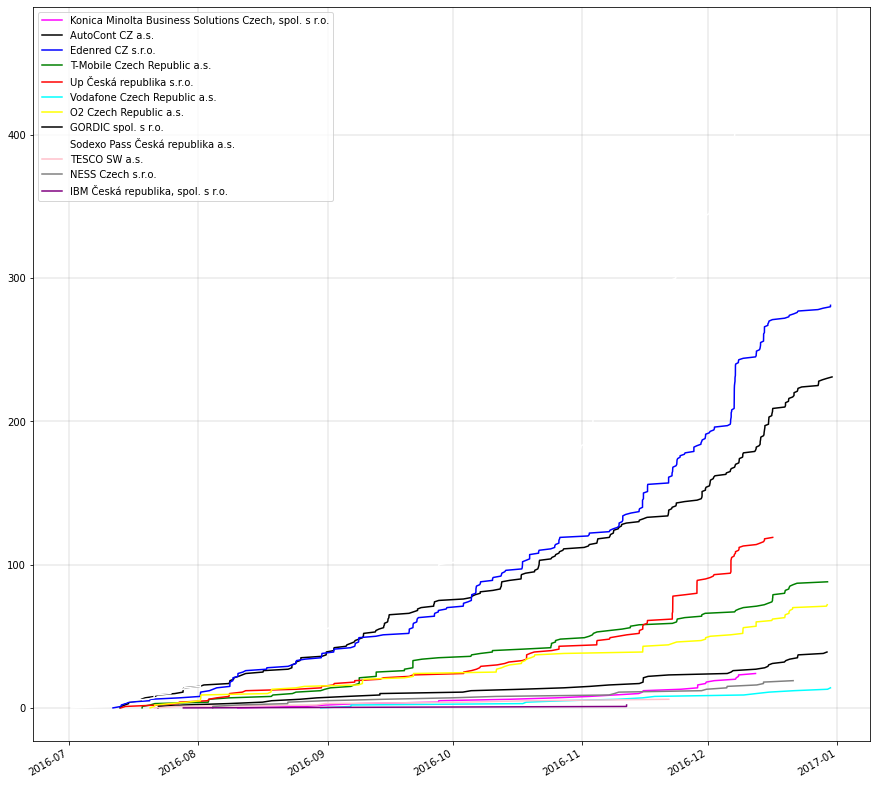

In [10]:
colors = ["magenta","black","blue","green","red","cyan","yellow","black","white","pink","gray","purple"]
fig= plt.figure(figsize=(15,15))
plt.grid(color='gray', linestyle='-', linewidth=0.25)
for i in range(0,len(supplier_index)):
    x = x_value[i]
    y = np.arange(len(y_value[i]))

    plt.plot(x,y,color=colors[i],label = dataset1.get_dictionary().get(supplier_index[i]))
    plt.gcf().autofmt_xdate()
    
plt.legend()

<b>Zhodnotenie: </b>
Najväčší rast výnosov vo verejnom sektore počas sledovaného obdobia (rok 2016) zaznamenal dodávateľ <b>Edenred CZ s.r.o</b>

<u><b>Riešenie<b><br></u>
Question_B som riešil tak že som si vybral obdobie za rok 2016 čomu zodpovedá aj dataframe <b>df</b>.<br>    
    
Popis algoritmu:<br>

Prvotná myšlienka bola vytvoriť funkciu do ktorej ak dáme SupplierIC nejakého dodávateľa, tak nám vráti súradnice x,y kde x symbolizuje rozmedzie dátumov
a y celkovú sumu ktorú si dodávateľ nafaktúroval (s DPH). Pre tento prípad som použil metódu get_dictionary(), ktorú som si vytvoril na hlavnom tasku v triede supplier táto metóda vracia zoznam všetkých firiem (spoločností) a to takto Kľúč = SupplierIC , hodnota = supplier_name <br><br>
    
- vytvoril som si list <b>supplier_index</b> ktorý mi slúži ako list supplier_IC všetkých spoločnosťí<br>
- funkcia obsahuje parametre x_value,y_value a index, kde x_value a y_value sú prázdne listy ktoré na konci append-ujem skutočnými súradnicami x,y kt. sú dané pre danú spoločnosť. Pomocou indexu ako parameter nastavujem supplier_ic spoločnosti -> supplier_ic = supplier_index[index_number]
- tak ďalej pomocou supplier_ic generujem dataframe pre daného dodávateľa.
- os y nastavujem ako os kt. obsahuje sumy za vyfakt. zakázky za obdobie 2016 (df)
- do poľa x_fist vkladám všetky dátumy z column PublishedAtUtc
- tieto dátumy treba previesť do Datetime formátu, na to využívam cyklus <b>for i in range(0,x_first.shape[0]): ...</b> v ktorom k date_time_str priradujem stringovú hodnotu x_first[i] podľa indexu. A vytváram premennú date_time_obj, ktorú používam na konvertovanie str formátu na datetime formát a tak isto táto premenná uchováva túto hodnotu.<br>
- v závere cyklu robím append do poľa x ktorý mi už slúži ako výsledná os x<br>   
- V závere celej funkcie priradujem do x_value a y_value hodnoty získané vo funkcií. 
<br>
Touto funkciou som bol teda schopný získať x,y súradnice na vykreslovanie pre jednu spoločnosť

<br>
cyklus for i in range(0,len(supplier_index)): .. my slúži len na to že chcem aby polia x_value a y_value obsahovali súradnice všetkých spoločností, kde celkový počet iterácií je rovný počtú spoločností.   

<br><br><br><br>

## Question C

Is any of the buyers/publishers consistently negotiating unusually high or low prices? Are there any reasons you can think of why this is possible?

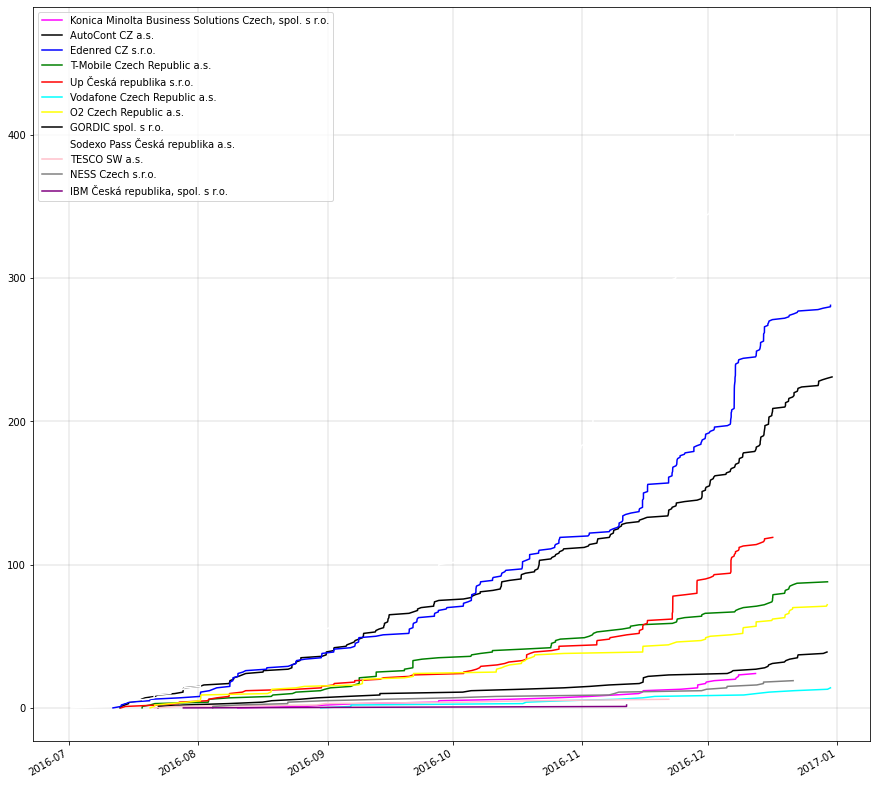

In [11]:
colors = ["magenta","black","blue","green","red","cyan","yellow","black","white","pink","gray","purple"]
fig= plt.figure(figsize=(15,15))
plt.grid(color='gray', linestyle='-', linewidth=0.25)
for i in range(0,len(supplier_index)):
    x = x_value[i]
    y = np.arange(len(y_value[i]))

    plt.plot(x,y,color=colors[i],label = dataset1.get_dictionary().get(supplier_index[i]))
    plt.gcf().autofmt_xdate()
    
plt.legend()

- Z grafu je vidieť že spoločnosť IBM Česká republika, dlhodobo v roku 2016 mala nižšie tržby ako aj to že spoločnosť Edenred CZ s.r.o, zvyšovala svoje ceny za každý mesiac počas roku 2016. Dlhdobo nízke tržby počas roku 2016 mali spoločnosti IBM, Tesco SW či Vodafone. Prečo tomu je tak? Len čistou úvahou si myslím že možno boli na trhu nový, prípadne nevedeli obsadiť tak tendre podľa predpokladu nakoľko nemali dostatok špecialistou na vyhotovenie zakázok.

<b>Is any of the buyers/publishers consistently negotiating unusually high or low prices? Are there any reasons you can think of why this is possible?</b>

In [12]:
df.sort_values(by=["ValueVatExcluded"],ascending=True).reset_index(drop=True)

,ContractId,VersionId,Subject,PublishedAtUtc,ValueVatExcluded,ValueVatIncluded,SupplierIC,SupplierName,PublisherIC
0,812493,864685,D1 ke sml. na poskyt. služeb KIVS-KTS,2016-12-20 10:24:57,-3.732287e+06,-4516067,60193336.0,O2 Czech Republic a.s.,7064.0
1,674173,715929,D1_ke sml.na poskyt. sluz. KIVS-KTS,2016-11-30 11:24:33,-2.748000e+05,-332508,60193336.0,O2 Czech Republic a.s.,7064.0
2,666785,707981,D5_ke sml.na poskyt. sluz. KIVS-KTS,2016-11-29 13:30:47,-2.383920e+05,-288454,64949681.0,T-Mobile Czech Republic a.s.,7064.0
3,374681,399085,D1 ke sml.na poskytování služeb KIVS-KTS,2016-10-14 14:08:21,-1.486960e+05,-179922,60193336.0,O2 Czech Republic a.s.,7064.0
4,197401,208421,D3 ke sml. o poskytování služeb KIVS-KTS,2016-09-08 13:50:45,-9.880000e+04,-119548,64949681.0,T-Mobile Czech Republic a.s.,7064.0
...,...,...,...,...,...,...,...,...,...
1368,46465,48381,Smíšená rámcová smlouva – rozvoj a údržba ISKN,2016-08-01 16:05:17,2.200000e+08,2.86e+08,60193336.0,O2 Czech Republic a.s.,25712.0
1369,186601,197141,Dodávky výpoč.techniky 2016-17_MV-38299,2016-09-07 09:04:40,2.600000e+08,314600000,47676795.0,AutoCont CZ a.s.,7064.0
1370,742289,789097,Rámcová smlouva na zajištění a dodávky stravov...,2016-12-08 15:31:23,6.960000e+08,6.96e+08,61860476.0,Sodexo Pass Česká republika a.s.,6963.0
1371,775397,825105,RS na pořiz. licencí k produkt.Microsoft,2016-12-14 12:32:26,4.600000e+09,5.566e+09,47676795.0,AutoCont CZ a.s.,7064.0


In [13]:
df.sort_values(by=["ValueVatExcluded"],ascending=True).reset_index(drop=True).head(30)

,ContractId,VersionId,Subject,PublishedAtUtc,ValueVatExcluded,ValueVatIncluded,SupplierIC,SupplierName,PublisherIC
0,812493,864685,D1 ke sml. na poskyt. služeb KIVS-KTS,2016-12-20 10:24:57,-3732287.0,-4516067,60193336.0,O2 Czech Republic a.s.,7064.0
1,674173,715929,D1_ke sml.na poskyt. sluz. KIVS-KTS,2016-11-30 11:24:33,-274800.0,-332508,60193336.0,O2 Czech Republic a.s.,7064.0
2,666785,707981,D5_ke sml.na poskyt. sluz. KIVS-KTS,2016-11-29 13:30:47,-238392.0,-288454,64949681.0,T-Mobile Czech Republic a.s.,7064.0
3,374681,399085,D1 ke sml.na poskytování služeb KIVS-KTS,2016-10-14 14:08:21,-148696.0,-179922,60193336.0,O2 Czech Republic a.s.,7064.0
4,197401,208421,D3 ke sml. o poskytování služeb KIVS-KTS,2016-09-08 13:50:45,-98800.0,-119548,64949681.0,T-Mobile Czech Republic a.s.,7064.0
5,252145,270241,D2 ke sml. o poskytování služeb KIVS-KTS,2016-09-21 10:01:30,-59540.0,-72043,64949681.0,T-Mobile Czech Republic a.s.,7064.0
6,389177,429877,D1_ke sml.na poskyt. sluz. KIVS-KTS,2016-10-20 11:24:21,-36252.0,-43865,60193336.0,O2 Czech Republic a.s.,7064.0
7,210969,223021,D4 ke smlouvě KIVS-KTS,2016-09-12 15:16:59,-36000.0,-43560,64949681.0,T-Mobile Czech Republic a.s.,7064.0
8,803849,855601,D3 ke smlouvě o poskyt.služeb KIVS-KTS,2016-12-19 12:34:13,-29060.0,-35162,60193336.0,O2 Czech Republic a.s.,7064.0
9,346937,369953,D1 ke sml.na poskytování služeb KIVS-KTS,2016-10-11 09:00:16,-28560.0,-34557,60193336.0,O2 Czech Republic a.s.,7064.0


Subjekt D1,D5,D3,D1 pár mesiacov mali v roku 2016 záporné čísla z hľadiska zaplat. faktúry. Pravdepod. im to vyfakt. štát preto reálne nedlžia na faktúrach, no záporným číslam nerozumiem.

Dlhodobo nízke ceny faktúr mali aj subjekty ktoré sa zaoberajú jedálenskými kupónmi. 

Prečo je nízka cena jedál. kupónov? Prepokladam že trhová hodnota kupónu sa dlhodobo nemení a preto boli aj takéto nízke obstarávacie náklady.

<br><br><br><br><br>
## Question D

D. Has any of the buyers/publishers switched suppliers and as a result achieved a better deal? List a couple of examples if you find any.

In [17]:
df_d = dataset1.df.sort_values(by=["Subject"]).reset_index(drop=True)
df_d[400:550]

,ContractId,VersionId,Subject,PublishedAtUtc,ValueVatExcluded,ValueVatIncluded,SupplierIC,SupplierName,PublisherIC
400,197401,208421,D3 ke sml. o poskytování služeb KIVS-KTS,2016-09-08 13:50:45,-98800.0,-119548,64949681.0,T-Mobile Czech Republic a.s.,7064.0
401,252149,270245,D3 ke sml. o poskytování služeb KIVS-KTS,2016-09-21 10:01:35,112381.0,135981,64949681.0,T-Mobile Czech Republic a.s.,7064.0
402,3272418,3530058,D3 ke sml.na poskytování služeb KIVS-CMS,2017-10-24 11:07:25,170000.0,214170,64949681.0,T-Mobile Czech Republic a.s.,7064.0
403,3631980,3917868,D3 ke sml.na poskytování služeb KIVS-CMS,2017-11-29 13:56:52,267020.0,323094,60193336.0,O2 Czech Republic a.s.,7064.0
404,2685070,2889286,D3 ke sml.na poskytování služeb KIVS-CMS,2017-08-16 13:57:09,-12500.0,-15125,64949681.0,T-Mobile Czech Republic a.s.,7064.0
...,...,...,...,...,...,...,...,...,...
545,5064895,5458555,Dodávka dvou kamer s instalací,2018-05-04 17:30:07,76388.0,76388,47676795.0,AutoCont CZ a.s.,843989.0
546,171217,180585,Dodávka fotoaparátu s objektivem,2016-09-02 13:40:42,53625.0,64886,47676795.0,AutoCont CZ a.s.,62156489.0
547,5568023,5997271,Dodávka funkcionality inventarizace,2018-06-27 09:54:34,156400.0,189244,47903783.0,GORDIC spol. s r.o.,60800691.0
548,3694680,4016712,Dodávka infrastruktury pro podporu agend v rám...,2017-12-07 14:11:08,2264431.0,2739962,47676795.0,AutoCont CZ a.s.,260231.0


Subjekt D3 29.11 v roku 2017 zmenil dodávateľa z T-Mobile Czech Republic a.s na O2 Czech republic a.s, avšak pravdepodobne kvôli lepšej ponuke 16.18 2017 znovu prešiel k dodávateľovi T-Mobile.